In [1]:
import sys
sys.path.append('../')

In [2]:
from functions import *

In [3]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numba import njit

In [14]:
arr = np.array([np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9]), np.array([10, 11, 12]), np.array([13, 14, 15])]).T
print(arr)
print(arr.shape)
print(arr[:2, :4])

[[ 1  4  7 10 13]
 [ 2  5  8 11 14]
 [ 3  6  9 12 15]]
(3, 5)
[[ 1  4  7 10]
 [ 2  5  8 11]]


In [4]:
@njit
def sistema(coords, t, a, b, k, α, β, γ):
    x, y, z = coords
    dydt = [dx_dt(a, b, k, α, x, y), dy_dt(k, x, y, z), dz_dt(k, β, γ, y, z)]
    return dydt

In [4]:
lyapunov_exp_mat = np.load('../Data/lyapunov_exp.npy')
alpha_gamma_mat = np.load('../Data/alpha_gamma.npy')

In [5]:
β = 1000.0
a = -8 / 7
b = -5 / 7
k = 1
init_cond = [1.1, 0.12, 0.01]

α, γ = alpha_gamma_mat[0, 14]
# α, γ = alpha_gamma_mat[0, 0]
print(lyapunov_exp_mat[0, 14])

n_steps, transient_drop = transient(1)
tvals = np.arange(0, int(n_steps*0.001), 0.001)

1.540954


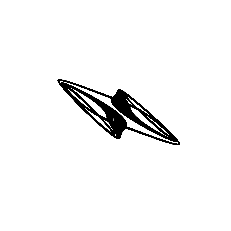

In [6]:
trajectory = rk_solver(a, b, k, α, β, γ, init_cond[0], init_cond[1], init_cond[2], n_steps, transient_drop, 0.001)

elevation, azimuth = 45, 45

ax = plt.axes(projection='3d')
ax.set_axis_off()
ax.view_init(elev=elevation, azim=azimuth)
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 0], 'black', linewidth=0.5)
    
plt.show()

In [ ]:
import mayavi.mlab as mlab

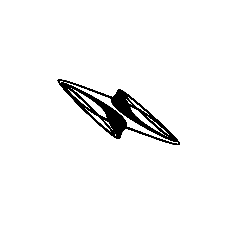

In [82]:
sol = odeint(sistema, init_cond, tvals, args=(a, b, k, α, β, γ))

elevation, azimuth = 45, 45

ax = plt.axes(projection='3d')
ax.plot3D(sol[transient_drop:, 0], sol[transient_drop:, 1], sol[transient_drop:, 0], 'black', linewidth=0.5)
ax.set_axis_off()
ax.view_init(elev=elevation, azim=azimuth)
    
plt.show()

In [16]:
%%timeit
rk_solver(a, b, k, α, β, γ, init_cond[0], init_cond[1], init_cond[2], n_steps, transient_drop)

48.7 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Write to file

In [ ]:
import struct

In [ ]:
alpha_gamma_mat.shape

In [ ]:
alpha_gamma_mat[19, 128]

In [ ]:
lyapunov_exp_mat_flat = lyapunov_exp_mat.ravel()
alpha_gamma_mat_flat = alpha_gamma_mat.ravel()
with open('../Data/lyapunov_exp.bin', 'wb') as f:
    f.write(struct.pack('d'*len(lyapunov_exp_mat_flat), *lyapunov_exp_mat_flat))
    
with open('../Data/alpha_gamma.bin', 'wb') as f:
    f.write(struct.pack('d'*len(alpha_gamma_mat_flat), *alpha_gamma_mat_flat))

In [ ]:
with open('data.bin', 'wb') as f:
    f.write(struct.pack('d', 12.3))
    f.write(struct.pack('d', 3.14))

In [10]:
print(lyapunov_exp_mat[0, 119])

-0.059023
